In [2]:
!git clone https://github.com/aymanezz/Climate_Impact_Agriculture_Yield.git


Cloning into 'Climate_Impact_Agriculture_Yield'...
remote: Enumerating objects: 60, done.
remote: Counting objects: 100% (60/60), done.
remote: Compressing objects: 100% (51/51), done.
remote: Total 60 (delta 16), reused 19 (delta 6), pack-reused 0
Receiving objects: 100% (60/60), 24.96 MiB | 6.76 MiB/s, done.
Resolving deltas: 100% (16/16), done.
Updating files: 100% (30/30), done.


In [3]:

import os
os.chdir('Climate_Impact_Agriculture_Yield')


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
# Define function for loading data
def load_data(file_path):
    return pd.read_csv(file_path)

In [6]:
def clean_data(df):
    return df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [7]:
def inspect_data(df):
    print(f"Shape of the dataframe: {df.shape}")
    print(f"Basic statistics:\n{df.describe()}")
    print(f"Missing values:\n{df.isna().sum()}")

In [8]:
def plot_indicator_distribution(df):
    plt.figure(figsize=(12, 6))
    sns.countplot(x='Indicator', data=df)
    plt.xticks(rotation=45)
    plt.title('Distribution of Indicators')
    plt.show()

In [9]:
def plot_value_variation_by_year(df):
    plt.figure(figsize=(12, 8))
    sns.lineplot(x='Year', y='Value', hue='Indicator', data=df)
    plt.title('Value Variation by Year for Each Indicator')
    plt.xlabel('Year')
    plt.ylabel('Value')
    plt.xticks(rotation=45)
    plt.legend(title='Indicator', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

In [59]:
def plot_scatter(df, x, y, hue,h=10,v=8):
    plt.figure(figsize=(h, v))
    sns.scatterplot(x=x, y=y, data=df, hue=hue)
    plt.title(f'Impact of {hue} on {y}')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.legend(title=hue)
    plt.show()

In [56]:
# Define function to visualize box plot
def plot_box(df, x, y,h=10,v=8):
    plt.figure(figsize=(h, v))
    sns.boxplot(x=x, y=y, data=df)
    plt.title(f'{y} Variation by {x}')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.xticks(rotation=45)
    plt.show()

In [12]:
def plot_avg_production(df, index, values):
    pivot_df = df.pivot_table(index=index, values=values, aggfunc='mean')
    plt.figure(figsize=(10, 6))
    pivot_df.plot(kind='bar', legend=None)
    plt.title(f'Average {values} by {index}')
    plt.xlabel(index)
    plt.ylabel(f'Average {values}')
    plt.xticks(rotation=45)
    plt.show()

**loading data in colab**

In [13]:
# Load the data
# Adjust file paths according to your environment
production1 = load_data('/content/Climate_Impact_Agriculture_Yield/data/modified/clean_productions1.csv')
production2 = load_data('/content/Climate_Impact_Agriculture_Yield/data/modified/clean_productions2.csv')
production3 = load_data('/content/Climate_Impact_Agriculture_Yield/data/modified/clean_productions3.csv')
production = pd.concat([production1, production2, production3], ignore_index=True)
temp_change = load_data('/content/Climate_Impact_Agriculture_Yield/data/modified/temperature_change.csv')
land_cover = load_data('/content/Climate_Impact_Agriculture_Yield/data/modified/land_cover.csv')
sea_level = load_data('/content/Climate_Impact_Agriculture_Yield/data/modified/sea_level.csv')
atmospheric = load_data('/content/Climate_Impact_Agriculture_Yield/data/modified/Atmospheric.csv')


In [14]:
'''
# Load the data
production = pd.read_csv('D:\\git\\Climate_Impact_Agriculture_Yield\\data\\modified\\production.csv')
temp_change = pd.read_csv('D:\\git\\Climate_Impact_Agriculture_Yield\\data\\modified\\temperature_change.csv')
land_cover = pd.read_csv('D:\\git\\Climate_Impact_Agriculture_Yield\\data\\modified\\land_cover.csv')
precip = pd.read_csv('D:\\git\\Climate_Impact_Agriculture_Yield\\data\\modified\\precip.csv')
sea_level = pd.read_csv('D:\\git\\Climate_Impact_Agriculture_Yield\\data\\modified\\sea_level.csv')

'''

"\n# Load the data\nproduction = pd.read_csv('D:\\git\\Climate_Impact_Agriculture_Yield\\data\\modified\\production.csv')\ntemp_change = pd.read_csv('D:\\git\\Climate_Impact_Agriculture_Yield\\data\\modified\\temperature_change.csv')\nland_cover = pd.read_csv('D:\\git\\Climate_Impact_Agriculture_Yield\\data\\modified\\land_cover.csv')\nprecip = pd.read_csv('D:\\git\\Climate_Impact_Agriculture_Yield\\data\\modified\\precip.csv')\nsea_level = pd.read_csv('D:\\git\\Climate_Impact_Agriculture_Yield\\data\\modified\\sea_level.csv')\n\n"

In [15]:
production.head()

,Unnamed: 0.1,Unnamed: 0,Area,Item,Element,Y1961,Y1962,Y1963,Y1964,Y1965,...,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020,Y2021,Y2022
0,0,0,Afghanistan,"Almonds, in shell",Gross Production Value (constant 2014-2016 tho...,1.042449e+08,1.105186e+08,1.076921e+08,1.128735e+08,1.161324e+08,...,2.134430e+05,1.385370e+05,1.225900e+05,1.660570e+05,1.379860e+05,1.739950e+05,1.931680e+05,1.987390e+05,3.248840e+05,3.235890e+05
1,1,1,Afghanistan,"Almonds, in shell",Gross Production Value (current thousand SLC),1.042449e+08,1.105186e+08,1.076921e+08,1.128735e+08,1.161324e+08,...,6.336462e+08,6.835050e+08,6.994889e+08,7.152111e+08,7.278068e+08,8.944441e+08,9.634183e+08,1.071486e+09,1.297379e+09,1.563556e+09
2,2,2,Afghanistan,"Almonds, in shell",Gross Production Value (constant 2014-2016 tho...,1.042449e+08,1.105186e+08,1.076921e+08,1.128735e+08,1.161324e+08,...,9.003038e+06,5.843497e+06,5.170855e+06,7.004306e+06,5.820251e+06,7.339134e+06,8.147840e+06,8.382859e+06,1.370364e+07,1.364904e+07
3,3,3,Afghanistan,"Anise, badian, coriander, cumin, caraway, fenn...",Gross Production Value (constant 2014-2016 tho...,1.042449e+08,1.105186e+08,1.076921e+08,1.128735e+08,1.161324e+08,...,2.717000e+04,4.673200e+04,3.912400e+04,3.767500e+04,3.963300e+04,3.881100e+04,3.870600e+04,3.905000e+04,3.885600e+04,3.887100e+04
4,4,4,Afghanistan,Apples,Gross Production Value (constant 2014-2016 tho...,7.127000e+03,7.127000e+03,7.127000e+03,8.685000e+03,9.629000e+03,...,3.709800e+04,4.219800e+04,4.235400e+04,6.650600e+04,8.044900e+04,1.025150e+05,1.181530e+05,1.278450e+05,1.518300e+05,1.500960e+05


In [16]:
production = clean_data(production)

In [17]:
production.head()

,Area,Item,Element,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,...,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020,Y2021,Y2022
0,Afghanistan,"Almonds, in shell",Gross Production Value (constant 2014-2016 tho...,1.042449e+08,1.105186e+08,1.076921e+08,1.128735e+08,1.161324e+08,1.187102e+08,1.188556e+08,...,2.134430e+05,1.385370e+05,1.225900e+05,1.660570e+05,1.379860e+05,1.739950e+05,1.931680e+05,1.987390e+05,3.248840e+05,3.235890e+05
1,Afghanistan,"Almonds, in shell",Gross Production Value (current thousand SLC),1.042449e+08,1.105186e+08,1.076921e+08,1.128735e+08,1.161324e+08,1.187102e+08,1.188556e+08,...,6.336462e+08,6.835050e+08,6.994889e+08,7.152111e+08,7.278068e+08,8.944441e+08,9.634183e+08,1.071486e+09,1.297379e+09,1.563556e+09
2,Afghanistan,"Almonds, in shell",Gross Production Value (constant 2014-2016 tho...,1.042449e+08,1.105186e+08,1.076921e+08,1.128735e+08,1.161324e+08,1.187102e+08,1.188556e+08,...,9.003038e+06,5.843497e+06,5.170855e+06,7.004306e+06,5.820251e+06,7.339134e+06,8.147840e+06,8.382859e+06,1.370364e+07,1.364904e+07
3,Afghanistan,"Anise, badian, coriander, cumin, caraway, fenn...",Gross Production Value (constant 2014-2016 tho...,1.042449e+08,1.105186e+08,1.076921e+08,1.128735e+08,1.161324e+08,1.187102e+08,1.188556e+08,...,2.717000e+04,4.673200e+04,3.912400e+04,3.767500e+04,3.963300e+04,3.881100e+04,3.870600e+04,3.905000e+04,3.885600e+04,3.887100e+04
4,Afghanistan,Apples,Gross Production Value (constant 2014-2016 tho...,7.127000e+03,7.127000e+03,7.127000e+03,8.685000e+03,9.629000e+03,1.076200e+04,1.302700e+04,...,3.709800e+04,4.219800e+04,4.235400e+04,6.650600e+04,8.044900e+04,1.025150e+05,1.181530e+05,1.278450e+05,1.518300e+05,1.500960e+05


In [18]:
pd.set_option('display.max_rows',100)
production[(production['Area'] == 'Afghanistan')&( production['Item'] == 'Apples')]

,Area,Item,Element,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,...,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020,Y2021,Y2022
4,Afghanistan,Apples,Gross Production Value (constant 2014-2016 tho...,7.127000e+03,7.127000e+03,7.127000e+03,8.685000e+03,9.629000e+03,1.076200e+04,1.302700e+04,...,3.709800e+04,4.219800e+04,4.235400e+04,66506.0,80449.0,102515.0,1.181530e+05,1.278450e+05,1.518300e+05,1.500960e+05
5,Afghanistan,Apples,Gross Production Value (current thousand SLC),1.042449e+08,1.105186e+08,1.076921e+08,1.128735e+08,1.161324e+08,1.187102e+08,1.188556e+08,...,6.336462e+08,6.835050e+08,6.994889e+08,4424354.0,6084815.0,4850210.0,9.634183e+08,1.071486e+09,1.297379e+09,1.563556e+09
6,Afghanistan,Apples,Gross Production Value (constant 2014-2016 tho...,3.664860e+05,3.664860e+05,3.664860e+05,4.465790e+05,4.951200e+05,5.533700e+05,6.698690e+05,...,1.907597e+06,2.169865e+06,2.177874e+06,3419801.0,4136755.0,5271382.0,6.075515e+06,6.573864e+06,7.807175e+06,7.718053e+06


In [29]:
grouped = production.groupby(['Area', 'Item'])['Element'].sum()
grouped

KeyError: 'Column not found: Element'

In [30]:
grouped = production.groupby(['Area', 'Item','Element']).size().reset_index(name='Count')


KeyError: 'Element'

In [ ]:
production.Element.unique()

In [ ]:
production['Element'].unique()

In [31]:
production = production[production['Element'] == 'Gross Production Value (constant 2014-2016 thousand I$)']
production.drop(columns = ['Element'],inplace = True)
production.reset_index(drop=True, inplace=True)

KeyError: 'Element'

In [ ]:
production.head()

In [32]:
melted_production = pd.melt(production, id_vars=['Area','Item'],var_name='Year', value_name='production')

In [33]:
melted_production.head()

,Area,Item,Year,production
0,Afghanistan,"Almonds, in shell",Y1961,1.042449e+08
1,Afghanistan,"Anise, badian, coriander, cumin, caraway, fenn...",Y1961,1.042449e+08
2,Afghanistan,Apples,Y1961,7.127000e+03
3,Afghanistan,Apricots,Y1961,2.621000e+04
4,Afghanistan,Barley,Y1961,7.364400e+04


In [34]:
melted_production['Year'] = melted_production['Year'].str.replace('Y','')

In [35]:
inspect_data(melted_production['production'])

Shape of the dataframe: (1285074,)
Basic statistics:
count    1.285074e+06
mean     5.599578e+07
std      1.693598e+08
min      0.000000e+00
25%      5.235000e+03
50%      7.330550e+04
75%      2.692360e+06
max      4.169291e+09
Name: production, dtype: float64
Missing values:
0


In [36]:
pd.set_option('display.max_rows',10)
temp_change


,Unnamed: 0,Area,Months,Element,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,...,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020,Y2021,Y2022,Y2023
0,0,Afghanistan,January,Temperature change,0.745,0.015,2.706,-5.250,1.854,3.796,...,1.716,2.017,3.594,1.367,2.111,2.911,-0.547,0.701,2.458,-2.200
1,2,Afghanistan,February,Temperature change,-1.787,2.390,3.875,-0.218,-0.100,3.529,...,-3.020,2.696,2.448,0.000,2.774,0.147,2.544,4.220,2.502,3.697
2,4,Afghanistan,March,Temperature change,0.445,1.268,0.365,1.632,-0.923,-0.010,...,-0.073,-0.465,2.468,0.994,4.632,0.360,0.664,2.625,3.756,3.895
3,6,Afghanistan,April,Temperature change,-1.786,0.040,0.859,-0.579,-1.850,-1.101,...,0.661,1.755,1.009,1.426,1.498,0.962,0.084,2.275,4.851,1.747
4,8,Afghanistan,May,Temperature change,1.351,-0.160,-0.727,-0.169,-0.190,-0.182,...,1.035,2.030,3.412,3.482,0.926,0.597,1.198,2.329,2.368,1.391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4823,9646,OECD,DecJanFeb,Temperature change,0.569,-0.355,-0.202,0.106,-0.727,-0.272,...,0.709,1.343,2.689,1.940,1.475,1.539,2.105,2.081,0.973,1.618
4824,9648,OECD,MarAprMay,Temperature change,-0.035,-0.185,0.148,-0.588,-0.104,-0.080,...,0.796,1.197,1.933,1.244,1.239,1.346,0.938,1.125,1.187,1.210
4825,9650,OECD,JunJulAug,Temperature change,0.105,0.054,-0.042,-0.107,-0.492,-0.013,...,0.789,0.950,1.314,1.083,1.083,1.062,1.305,1.387,1.499,1.743
4826,9652,OECD,SepOctNov,Temperature change,0.039,0.467,0.673,-0.146,-0.193,-0.291,...,0.998,1.679,1.535,1.204,0.577,1.214,1.376,1.763,1.289,2.254


we will focus only for the yearly values in the data

In [37]:
temp_change = temp_change[temp_change['Months'] == 'Meteorological year']

In [38]:
temp_change.columns

Index(['Unnamed: 0', 'Area', 'Months', 'Element', 'Y1961', 'Y1962', 'Y1963',
       'Y1964', 'Y1965', 'Y1966', 'Y1967', 'Y1968', 'Y1969', 'Y1970', 'Y1971',
       'Y1972', 'Y1973', 'Y1974', 'Y1975', 'Y1976', 'Y1977', 'Y1978', 'Y1979',
       'Y1980', 'Y1981', 'Y1982', 'Y1983', 'Y1984', 'Y1985', 'Y1986', 'Y1987',
       'Y1988', 'Y1989', 'Y1990', 'Y1991', 'Y1992', 'Y1993', 'Y1994', 'Y1995',
       'Y1996', 'Y1997', 'Y1998', 'Y1999', 'Y2000', 'Y2001', 'Y2002', 'Y2003',
       'Y2004', 'Y2005', 'Y2006', 'Y2007', 'Y2008', 'Y2009', 'Y2010', 'Y2011',
       'Y2012', 'Y2013', 'Y2014', 'Y2015', 'Y2016', 'Y2017', 'Y2018', 'Y2019',
       'Y2020', 'Y2021', 'Y2022', 'Y2023'],
      dtype='object')

In [39]:
temp_change.drop(columns=['Unnamed: 0','Months','Element'],inplace = True)

<ipython-input-39-9663d0ea0565>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_change.drop(columns=['Unnamed: 0','Months','Element'],inplace = True)


In [40]:
temp_change.columns

Index(['Area', 'Y1961', 'Y1962', 'Y1963', 'Y1964', 'Y1965', 'Y1966', 'Y1967',
       'Y1968', 'Y1969', 'Y1970', 'Y1971', 'Y1972', 'Y1973', 'Y1974', 'Y1975',
       'Y1976', 'Y1977', 'Y1978', 'Y1979', 'Y1980', 'Y1981', 'Y1982', 'Y1983',
       'Y1984', 'Y1985', 'Y1986', 'Y1987', 'Y1988', 'Y1989', 'Y1990', 'Y1991',
       'Y1992', 'Y1993', 'Y1994', 'Y1995', 'Y1996', 'Y1997', 'Y1998', 'Y1999',
       'Y2000', 'Y2001', 'Y2002', 'Y2003', 'Y2004', 'Y2005', 'Y2006', 'Y2007',
       'Y2008', 'Y2009', 'Y2010', 'Y2011', 'Y2012', 'Y2013', 'Y2014', 'Y2015',
       'Y2016', 'Y2017', 'Y2018', 'Y2019', 'Y2020', 'Y2021', 'Y2022', 'Y2023'],
      dtype='object')

In [41]:

# Reshape using pd.melt()
melted_temp = pd.melt(temp_change, id_vars=['Area'],var_name='Year', value_name='Temperature Change')

In [42]:
melted_temp

,Area,Year,Temperature Change
0,Afghanistan,Y1961,-0.126
1,Albania,Y1961,0.635
2,Algeria,Y1961,0.155
3,American Samoa,Y1961,0.121
4,Andorra,Y1961,0.756
...,...,...,...
17887,Low Income Food Deficit Countries,Y2023,1.389
17888,Net Food Importing Developing Countries,Y2023,1.505
17889,Annex I countries,Y2023,2.003
17890,Non-Annex I countries,Y2023,1.583


In [52]:
inspect_data(melted_temp['Temperature Change'])

Shape of the dataframe: (17892,)
Basic statistics:
count    17892.000000
mean         0.529737
std          0.649991
min         -3.251000
25%          0.070000
50%          0.442000
75%          0.931000
max          5.327000
Name: Temperature Change, dtype: float64
Missing values:
0


In [43]:
melted_temp['Year'] = melted_temp['Year'].str.replace('Y','')

In [44]:
melted_temp.head()

,Area,Year,Temperature Change
0,Afghanistan,1961,-0.126
1,Albania,1961,0.635
2,Algeria,1961,0.155
3,American Samoa,1961,0.121
4,Andorra,1961,0.756


In [46]:
melted_production

,Area,Item,Year,production
0,Afghanistan,"Almonds, in shell",1961,1.042449e+08
1,Afghanistan,"Anise, badian, coriander, cumin, caraway, fenn...",1961,1.042449e+08
2,Afghanistan,Apples,1961,7.127000e+03
3,Afghanistan,Apricots,1961,2.621000e+04
4,Afghanistan,Barley,1961,7.364400e+04
...,...,...,...,...
1285069,Net Food Importing Developing Countries,Oilcrops Primary,2022,3.001882e+07
1285070,Net Food Importing Developing Countries,"Roots and Tubers, Total",2022,4.482258e+07
1285071,Net Food Importing Developing Countries,Sugar Crops Primary,2022,1.084941e+07
1285072,Net Food Importing Developing Countries,Vegetables and Fruit Primary,2022,1.026037e+08


In [47]:
merged = pd.merge(melted_production,melted_temp,on=['Area','Year'])

In [48]:
merged

,Area,Item,Year,production,Temperature Change
0,Afghanistan,"Almonds, in shell",1961,1.042449e+08,-0.126
1,Afghanistan,"Anise, badian, coriander, cumin, caraway, fenn...",1961,1.042449e+08,-0.126
2,Afghanistan,Apples,1961,7.127000e+03,-0.126
3,Afghanistan,Apricots,1961,2.621000e+04,-0.126
4,Afghanistan,Barley,1961,7.364400e+04,-0.126
...,...,...,...,...,...
1266779,Net Food Importing Developing Countries,Oilcrops Primary,2022,3.001882e+07,1.058
1266780,Net Food Importing Developing Countries,"Roots and Tubers, Total",2022,4.482258e+07,1.058
1266781,Net Food Importing Developing Countries,Sugar Crops Primary,2022,1.084941e+07,1.058
1266782,Net Food Importing Developing Countries,Vegetables and Fruit Primary,2022,1.026037e+08,1.058


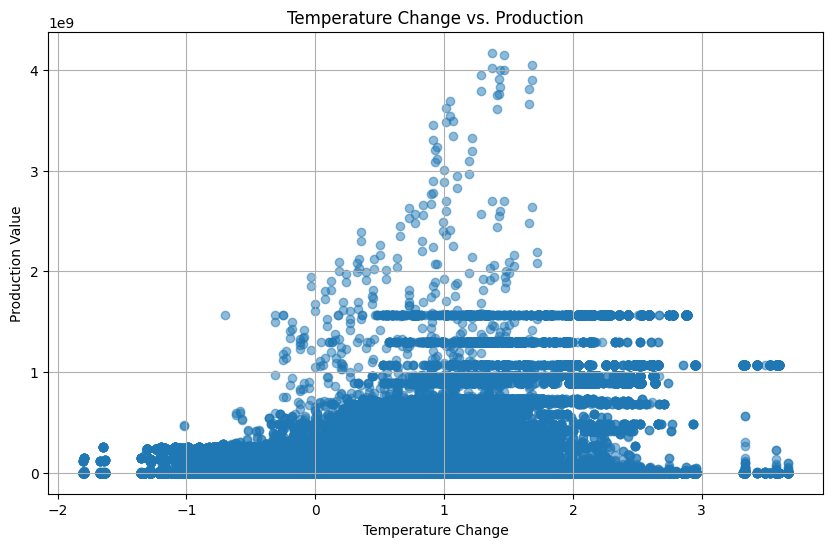

In [49]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(merged['Temperature Change'], merged['production'], alpha=0.5)
plt.title('Temperature Change vs. Production')
plt.xlabel('Temperature Change')
plt.ylabel('Production Value')
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


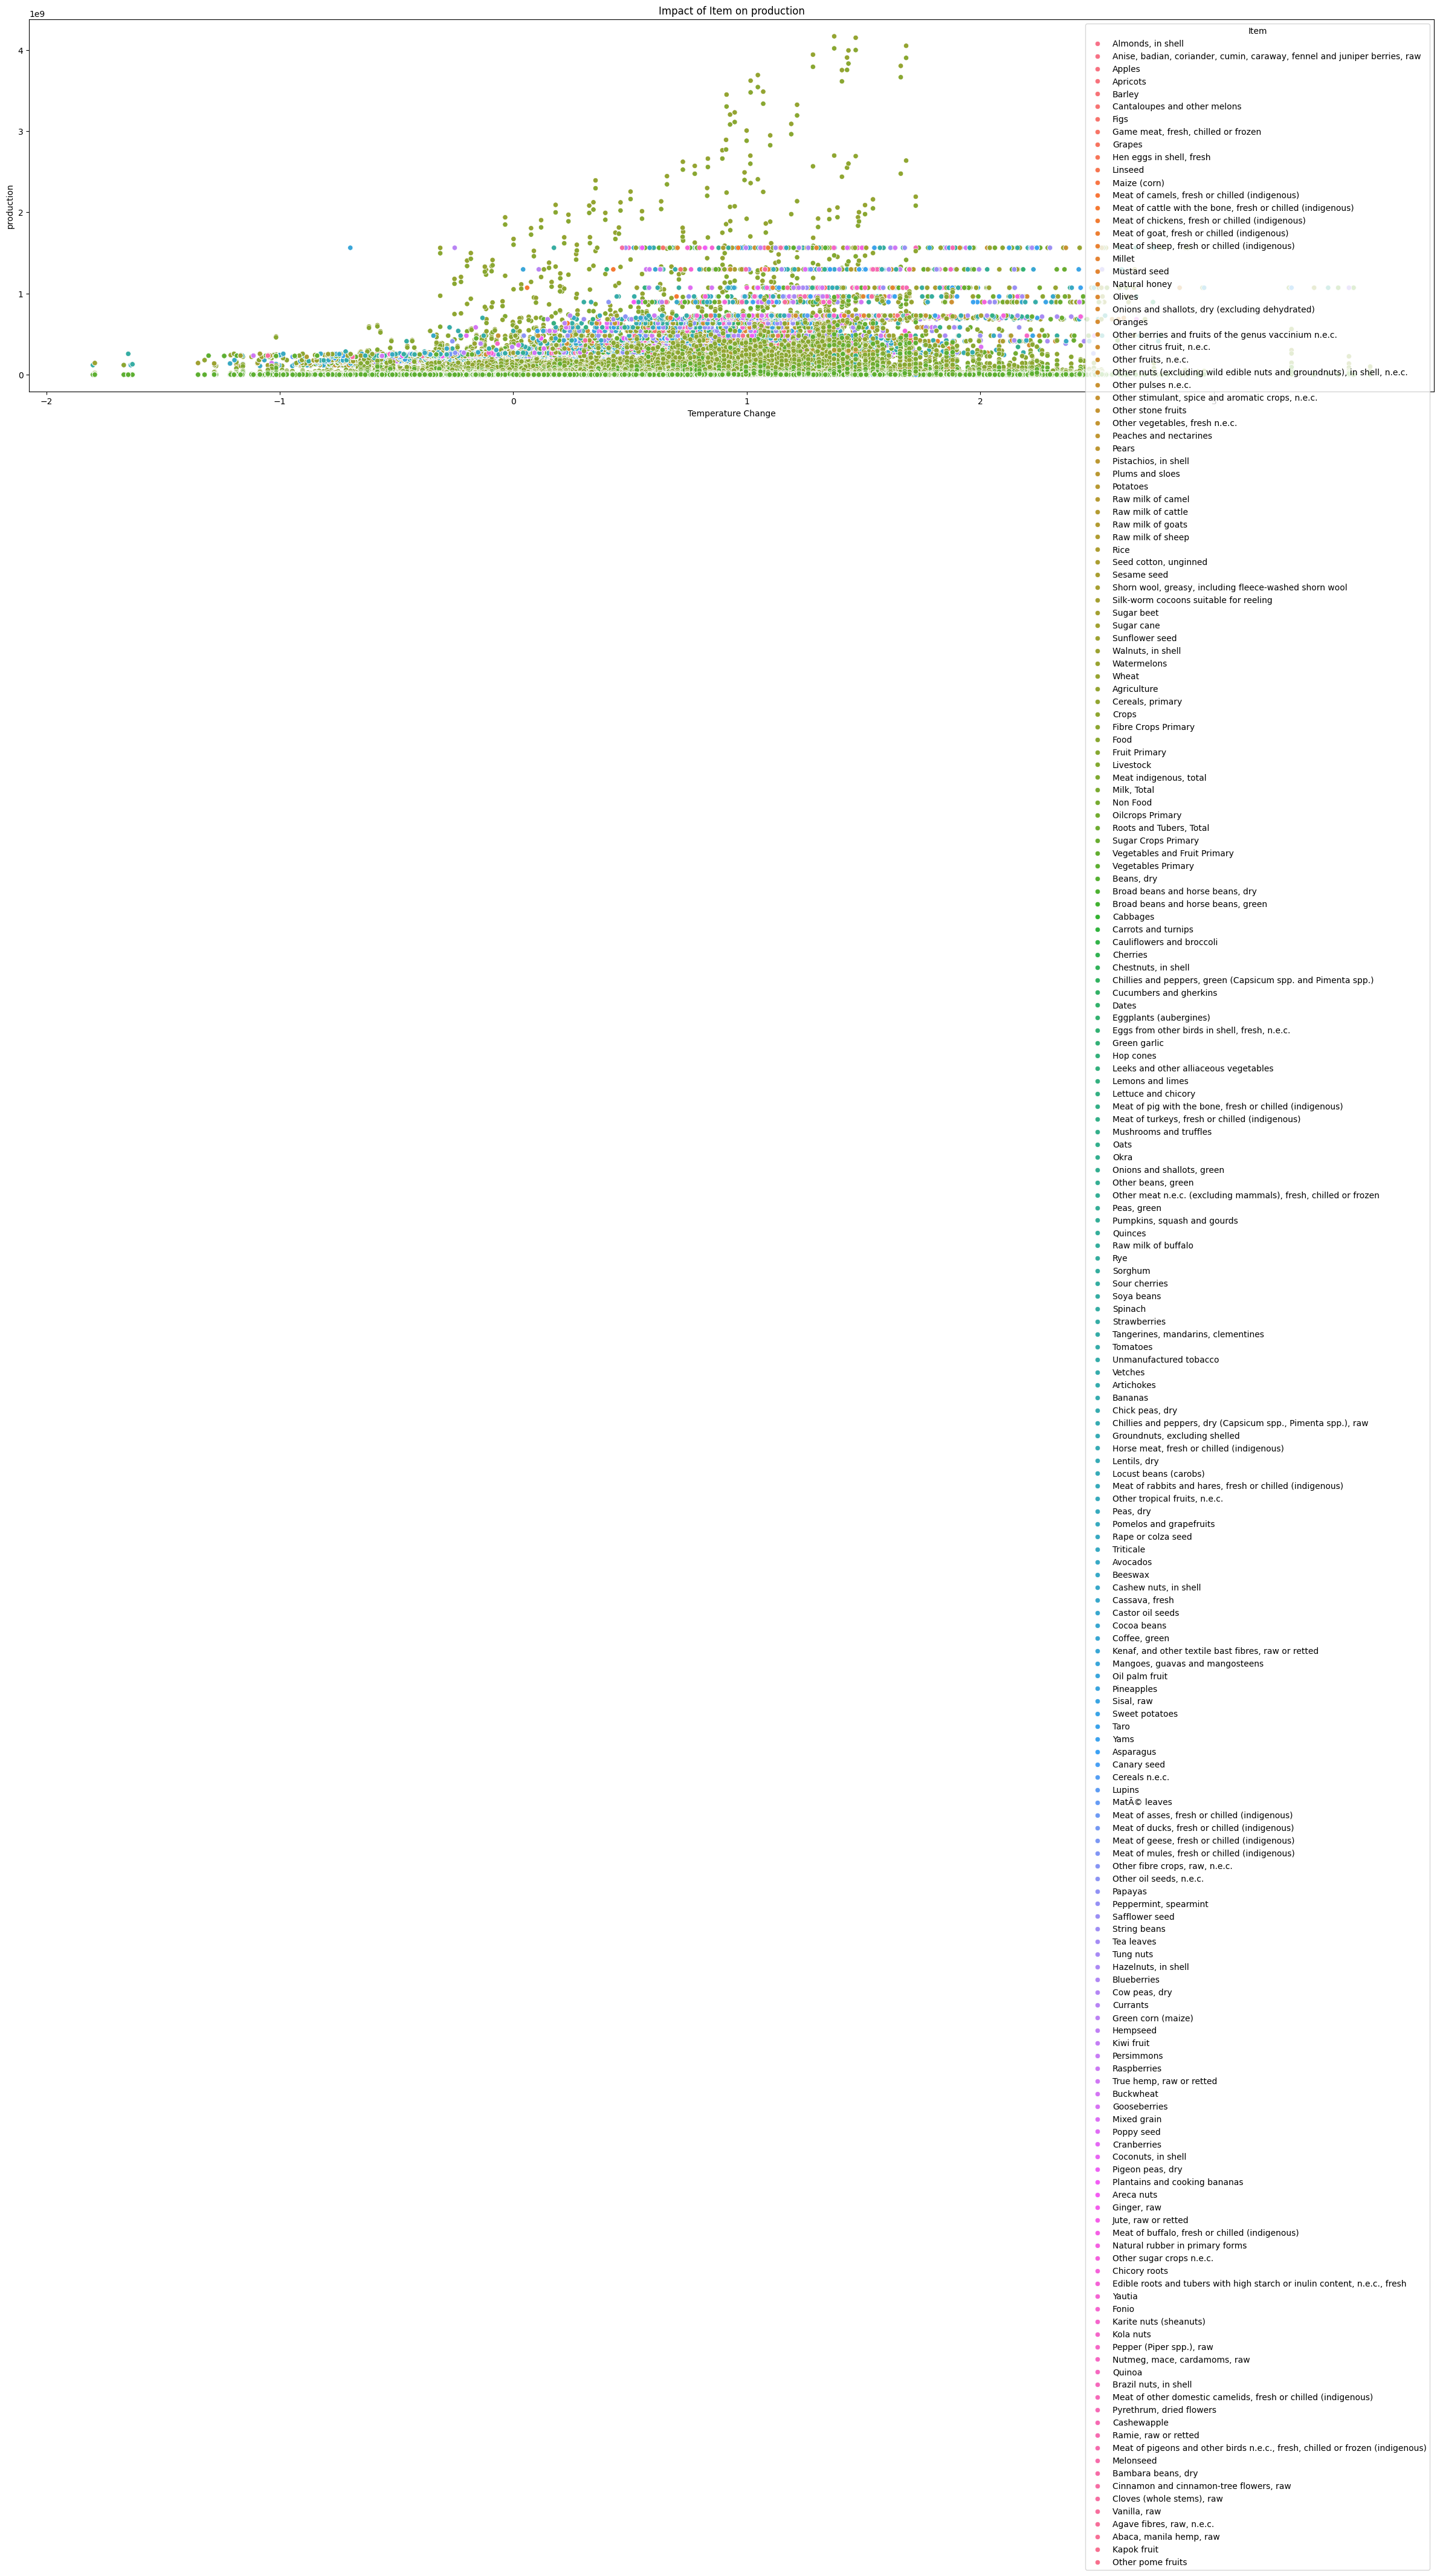

In [60]:
plot_scatter(merged, 'Temperature Change', 'production', 'Item',30)

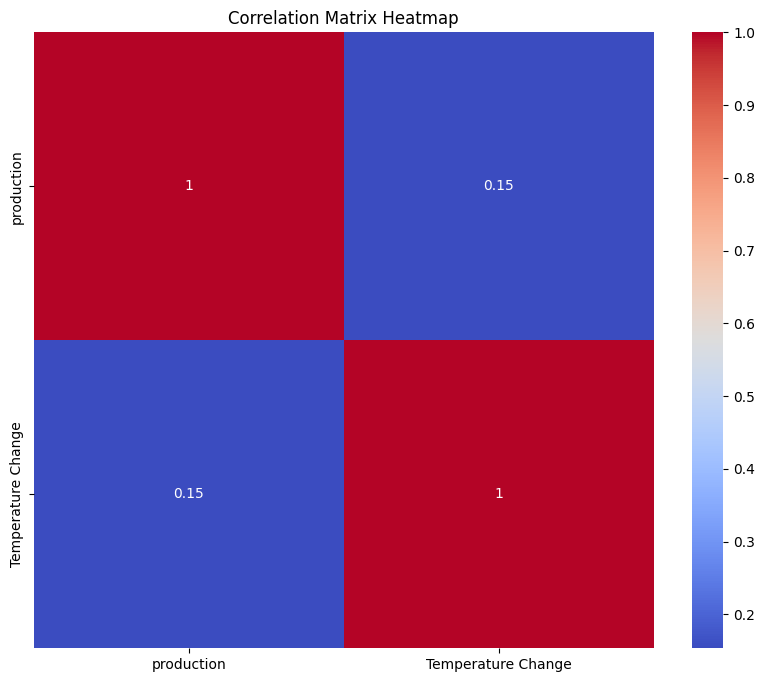

In [50]:
numeric_columns = merged.select_dtypes(include=['number'])
correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

 while there is a slight tendency for production to increase with temperature change, the relationship is not very strong, indicating that other factors likely play a significant role in determining production values.







---



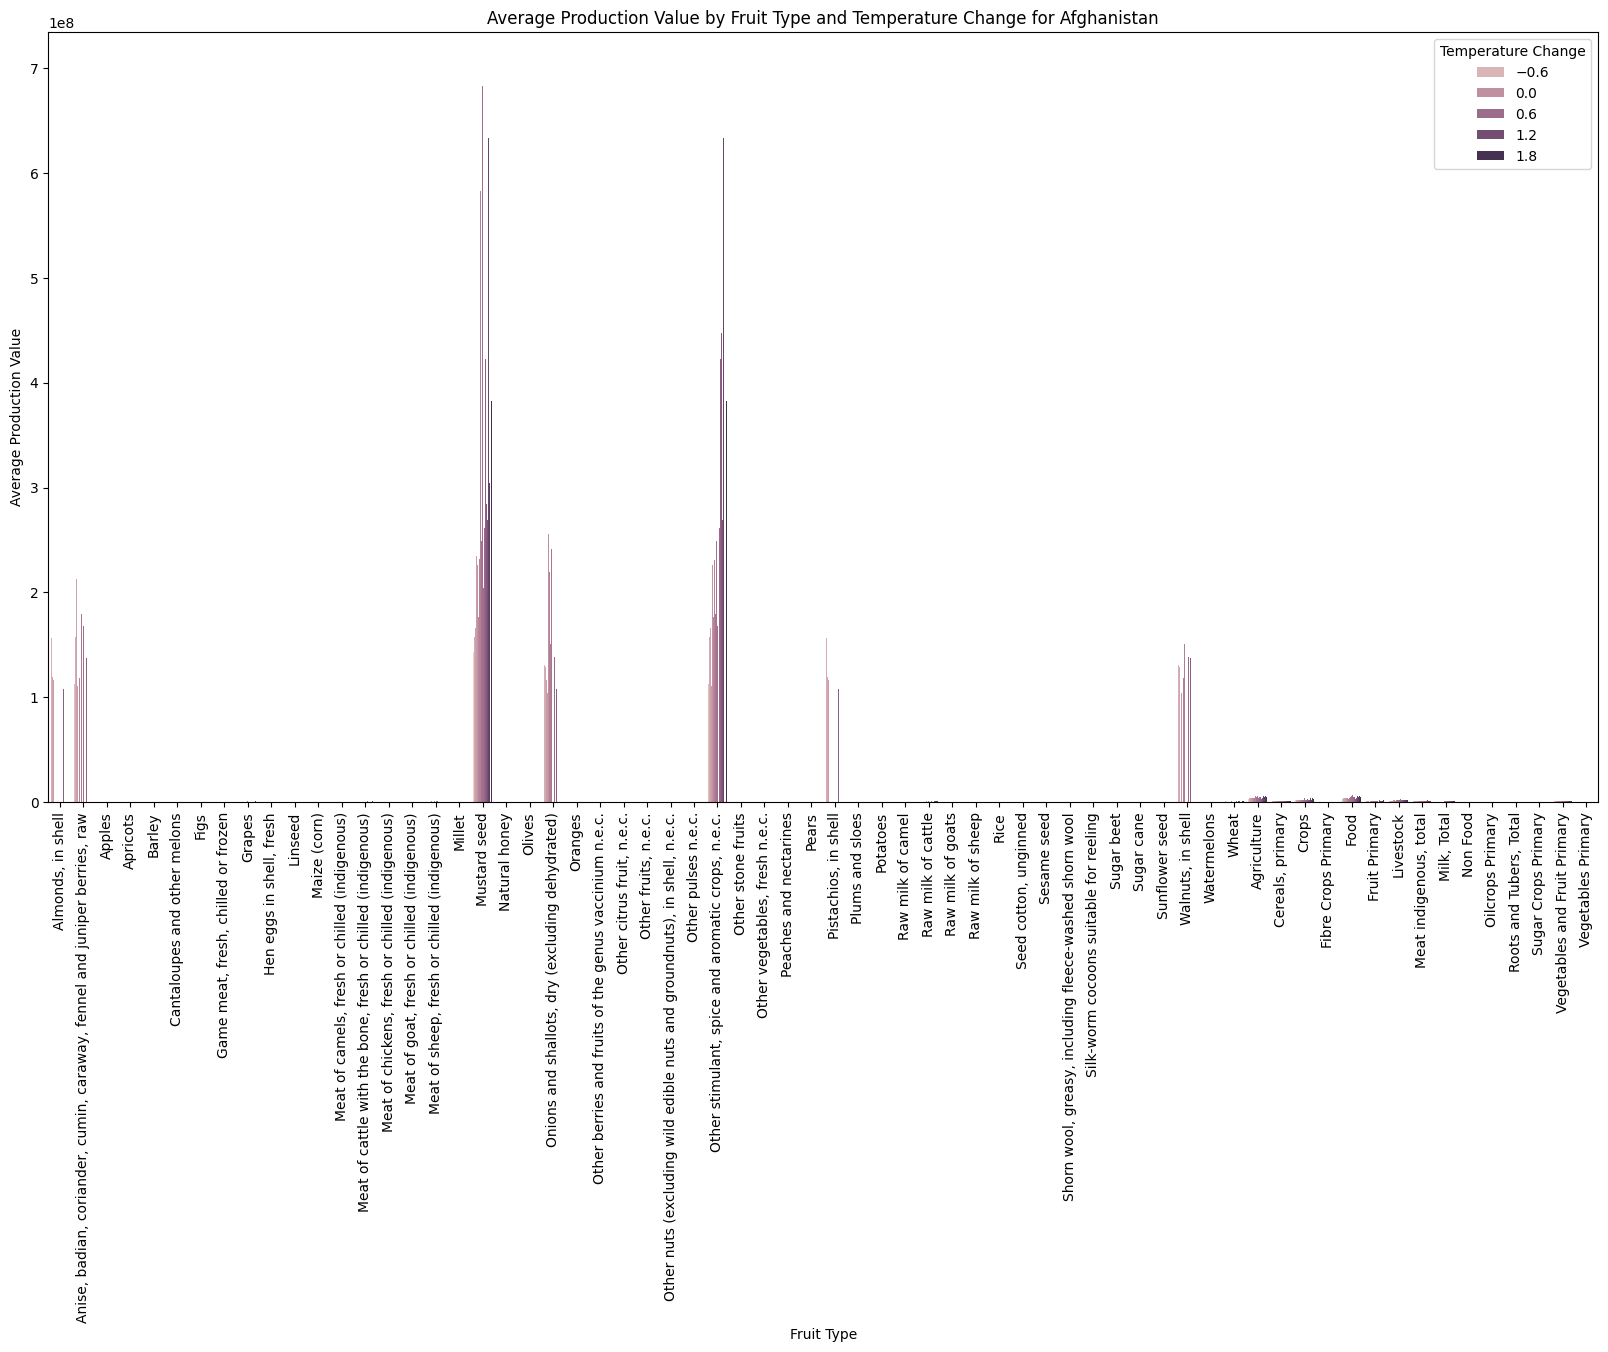

In [51]:
country = 'Afghanistan'
country_data = merged[merged['Area'] == country]

# Plotting
plt.figure(figsize=(20, 10))
sns.barplot(x='Item', y='production', hue='Temperature Change', data=country_data)
plt.title(f'Average Production Value by Fruit Type and Temperature Change for {country}')
plt.xlabel('Fruit Type')
plt.ylabel('Average Production Value')
plt.xticks(rotation=90)
plt.legend(title='Temperature Change')
plt.show()

In [35]:
correlation = country_data['Temperature Change'].corr(country_data['production'])
print(f"Correlation between Temperature Change and Production in {country}: {correlation}")

# Average production by fruit type for the specific country
average_production_by_fruit = country_data.groupby('Item')['production'].mean()
print(f"Average Production by Fruit Type in {country}:")
print(average_production_by_fruit)

Correlation between Temperature Change and Production in Afghanistan: -0.034754917132666034
Average Production by Fruit Type in Afghanistan:
Item
Agriculture                                                                  4.230142e+06
Almonds, in shell                                                            3.125898e+07
Anise, badian, coriander, cumin, caraway, fennel and juniper berries, raw    6.324260e+07
Apples                                                                       2.600915e+04
Apricots                                                                     4.756663e+04
                                                                                 ...     
Vegetables Primary                                                           2.458857e+05
Vegetables and Fruit Primary                                                 1.097169e+06
Walnuts, in shell                                                            3.119325e+07
Watermelons                                 

**This analysis investigates the relationship between temperature change and agricultural production in Afghanistan. The correlation coefficient of -0.0348 indicates almost no linear relationship between the two variables. Additionally, the average production values for various fruit types were calculated, revealing that crops like almonds and juniper berries have the highest average production values. These insights help understand how different crops are affected by climate changes in Afghanistan**

lets try another country

In [36]:
merged['Area'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belgium-Luxembourg', 'Belize',
       'Benin', 'Bhutan', 'Bolivia (Plurinational State of)',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China',
       'China, Hong Kong SAR', 'China, Macao SAR', 'China, mainland',
       'China, Taiwan Province of', 'Colombia', 'Comoros', 'Congo',
       'Cook Islands', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', 'Czechoslovakia',
       "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', '

Democratic People's Republic of Korea


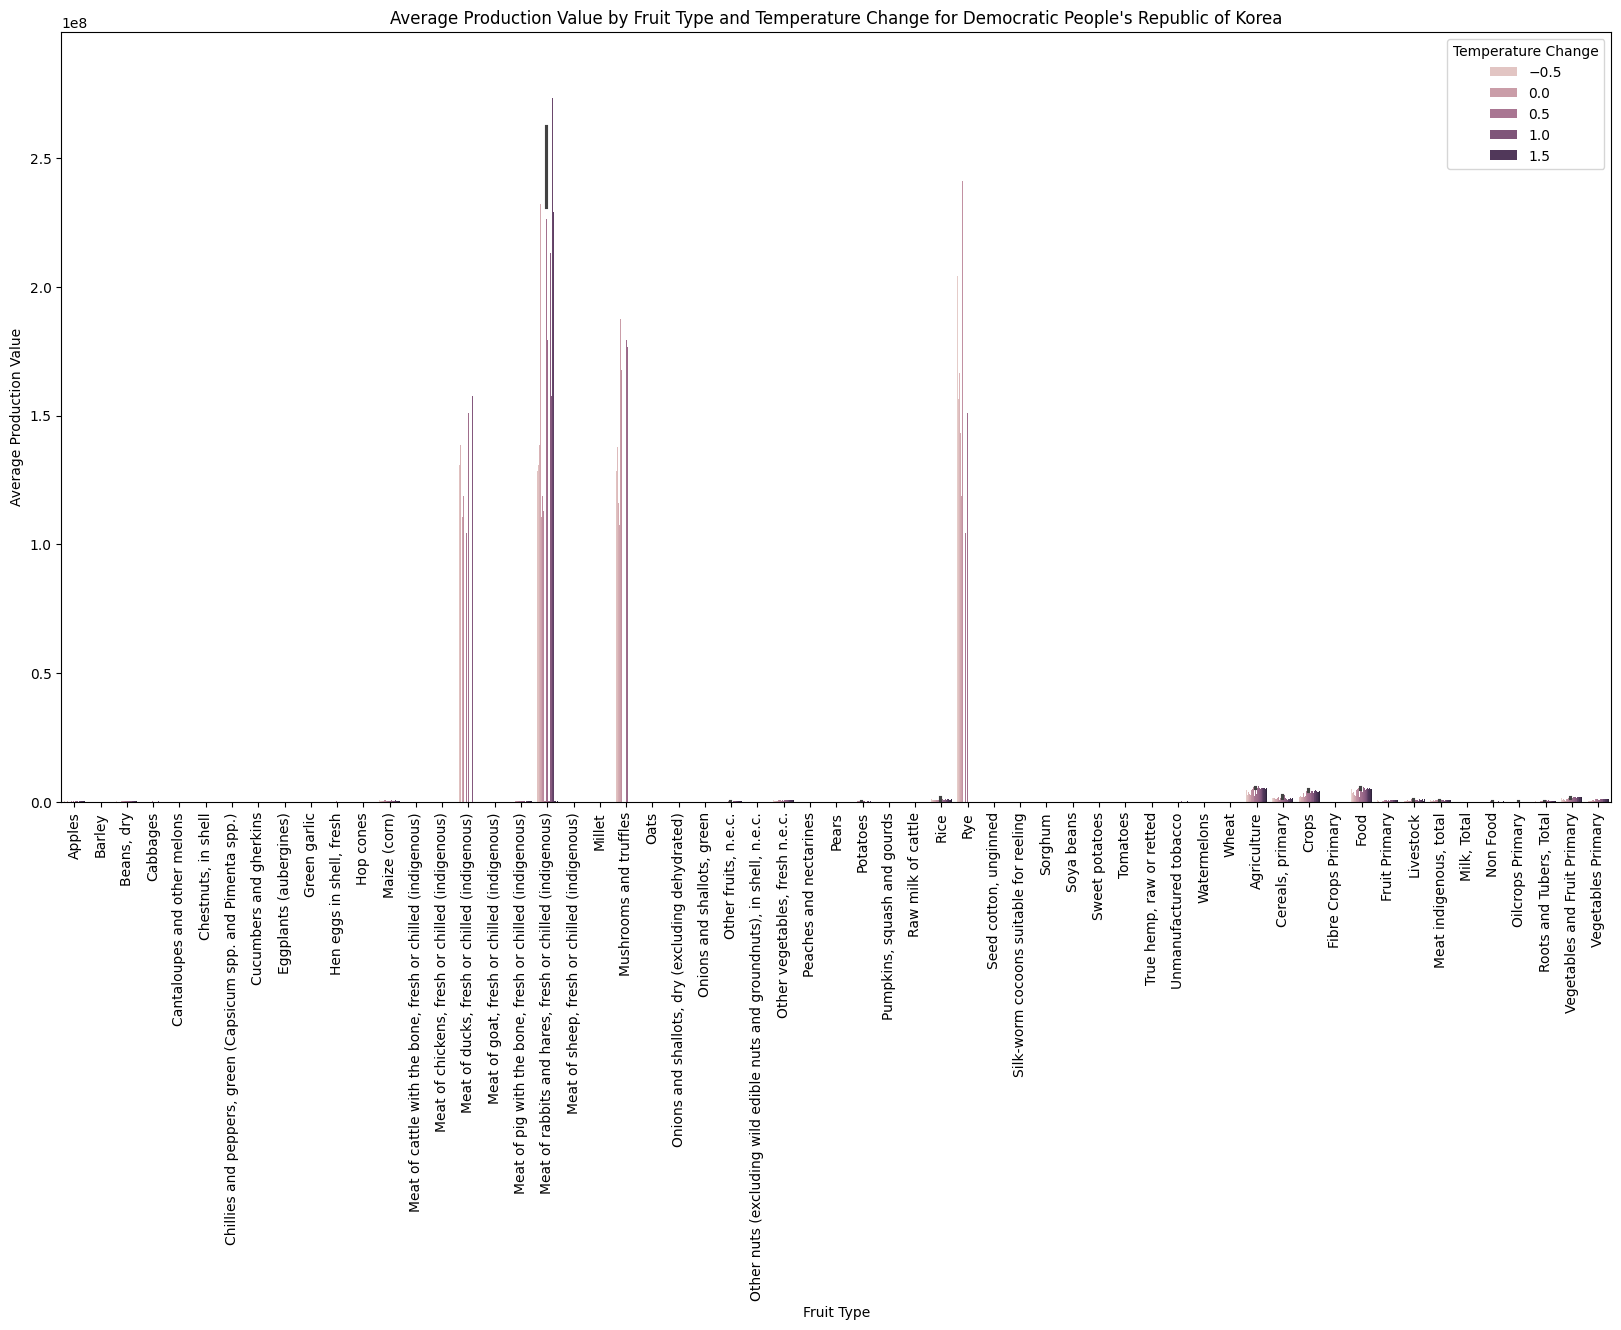

In [37]:
country = np.random.choice(merged['Area'].unique())
print(country)
country_data = merged[merged['Area'] == country]

# Plotting
plt.figure(figsize=(20, 10))
sns.barplot(x='Item', y='production', hue='Temperature Change', data=country_data)
plt.title(f'Average Production Value by Fruit Type and Temperature Change for {country}')
plt.xlabel('Fruit Type')
plt.ylabel('Average Production Value')
plt.xticks(rotation=90)
plt.legend(title='Temperature Change')
plt.show()

In [38]:

correlation = country_data['Temperature Change'].corr(country_data['production'])
print(f"Correlation between Temperature Change and Production in {country}: {correlation}")

# Average production by fruit type for the specific country
average_production_by_fruit = country_data.groupby('Item')['production'].mean()
print(f"Average Production by Fruit Type in {country}:")
print(average_production_by_fruit)

Correlation between Temperature Change and Production in Democratic People's Republic of Korea: -0.10669953478760508
Average Production by Fruit Type in Democratic People's Republic of Korea:
Item
Agriculture                     4.484434e+06
Apples                          2.480863e+05
Barley                          2.175832e+04
Beans, dry                      2.139829e+05
Cabbages                        1.341162e+05
                                    ...     
Unmanufactured tobacco          1.324785e+05
Vegetables Primary              8.849823e+05
Vegetables and Fruit Primary    1.425656e+06
Watermelons                     1.680187e+04
Wheat                           2.628835e+04
Name: production, Length: 59, dtype: float64


In [39]:
land_cover.rename(columns = {'Country':'Area'},inplace = True)
land_cover.head()


,Unnamed: 0,Area,Indicator,F1992,F1993,F1994,F1995,F1996,F1997,F1998,...,F2011,F2012,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020
0,0,Advanced Economies,Climate Altering Land Cover Index,95.942016,97.027517,97.030493,97.339731,97.462165,97.529704,97.691446,...,99.903233,99.963105,99.978710,99.996285,100.0,100.010114,100.076907,100.229096,100.355972,100.394188
1,1,Advanced Economies excluding US,Climate Altering Land Cover Index,94.851414,96.800658,96.767106,97.090049,97.172806,97.218736,97.319020,...,100.051718,100.104101,100.069837,100.032246,100.0,99.979035,100.007709,99.995467,100.020988,100.058737
2,2,Africa,Climate Altering Land Cover Index,91.590697,93.557008,93.500134,94.266184,94.532599,94.914910,95.300060,...,98.793984,100.076777,100.086539,99.972989,100.0,99.840223,99.802754,99.725391,99.758857,99.864541
3,3,Americas,Climate Altering Land Cover Index,92.924554,93.023248,92.940142,94.263051,94.632936,94.902416,95.405837,...,99.025837,99.287572,99.647269,99.784025,100.0,100.229617,100.753590,100.902233,100.997645,101.013420
4,4,Asia,Climate Altering Land Cover Index,100.417597,100.022963,99.578377,99.613406,99.621526,99.845212,100.065291,...,100.133256,99.990573,99.915897,100.009021,100.0,99.723557,99.729292,99.847777,99.709031,99.730813


In [40]:
land_cover = land_cover.loc[:, ~land_cover.columns.str.contains('^Unnamed')]

In [41]:
land_cover.Indicator.unique()

array(['Climate Altering Land Cover Index', 'Total Land Cover',
       'Artificial surfaces (including urban and associated areas)',
       'Grassland', 'Herbaceous crops', 'Inland water bodies',
       'Mangroves', 'Permanent snow and glaciers', 'Shrub-covered areas',
       'Shrubs and/or herbaceous vegetation, aquatic or regularly flooded',
       'Sparsely natural vegetated areas', 'Terrestrial barren land',
       'Tree-covered areas', 'Woody crops'], dtype=object)

In [42]:
land_cover = pd.melt(land_cover,id_vars = ['Area','Indicator'],var_name = 'Year',value_name = 'Value')


In [43]:
land_cover.head()

,Area,Indicator,Year,Value
0,Advanced Economies,Climate Altering Land Cover Index,F1992,95.942016
1,Advanced Economies excluding US,Climate Altering Land Cover Index,F1992,94.851414
2,Africa,Climate Altering Land Cover Index,F1992,91.590697
3,Americas,Climate Altering Land Cover Index,F1992,92.924554
4,Asia,Climate Altering Land Cover Index,F1992,100.417597


In [44]:
land_cover['Year'] = land_cover['Year'].str.replace('F','')

In [45]:
land_cover.head()

,Area,Indicator,Year,Value
0,Advanced Economies,Climate Altering Land Cover Index,1992,95.942016
1,Advanced Economies excluding US,Climate Altering Land Cover Index,1992,94.851414
2,Africa,Climate Altering Land Cover Index,1992,91.590697
3,Americas,Climate Altering Land Cover Index,1992,92.924554
4,Asia,Climate Altering Land Cover Index,1992,100.417597


we don not need the impact of land cover on climate we focus here on the impact on production so we don't need this column 'climate altering land cover index'

In [46]:
land_cover = land_cover[land_cover['Indicator'] != 'Climate Altering Land Cover Index']

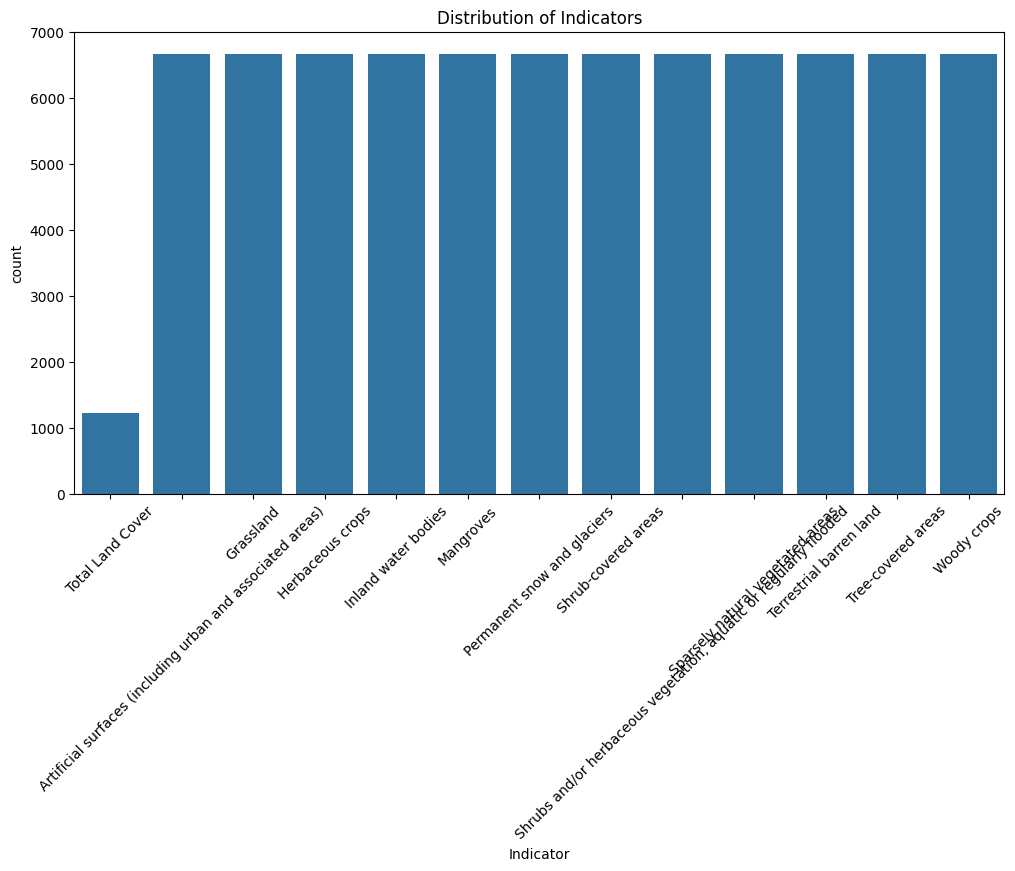

In [47]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Indicator', data=land_cover)
plt.xticks(rotation=45)
plt.title('Distribution of Indicators')
plt.show()


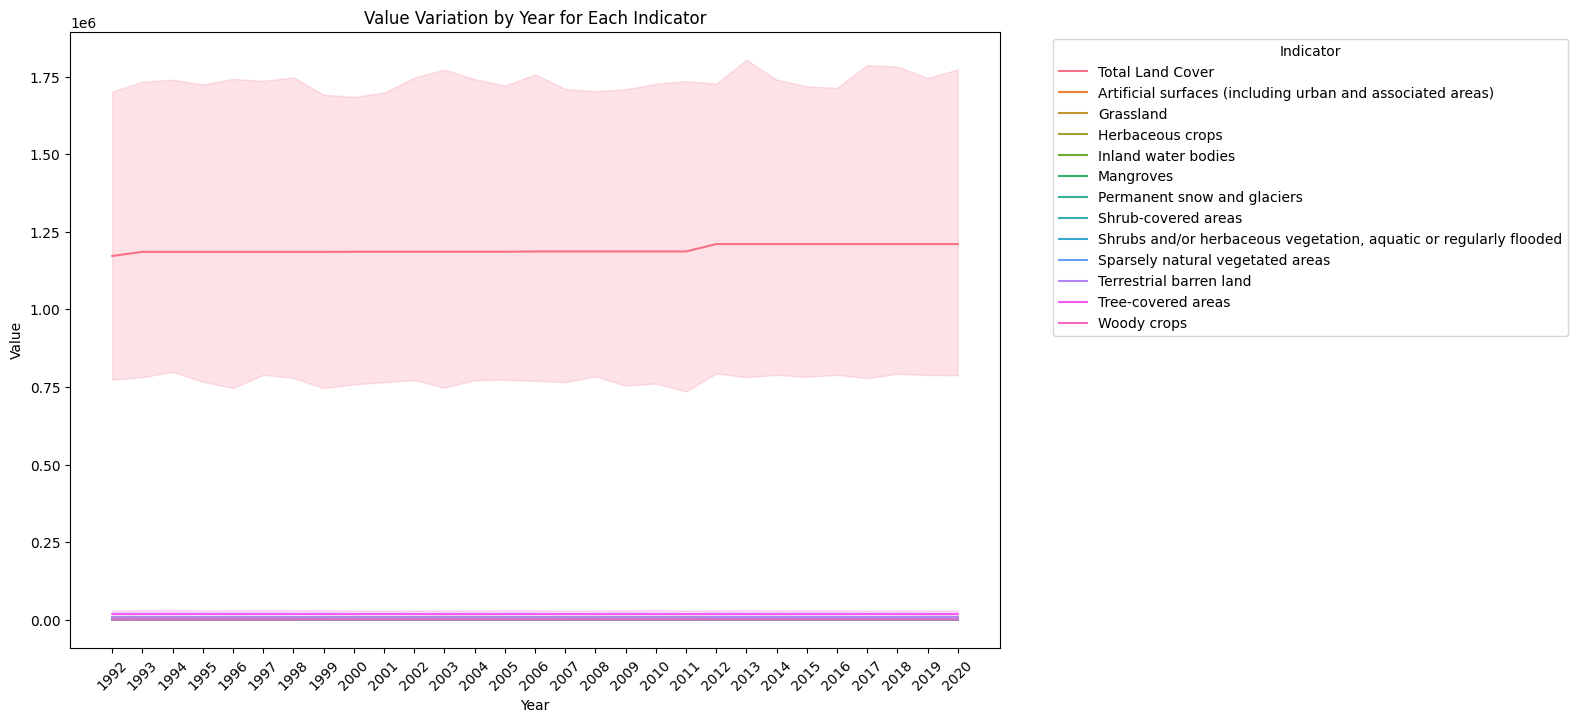

In [48]:
plt.figure(figsize=(12, 8))
sns.lineplot(x='Year', y='Value', hue='Indicator', data=land_cover)
plt.title('Value Variation by Year for Each Indicator')
plt.xlabel('Year')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.legend(title='Indicator', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [49]:
melted_production.shape,land_cover.shape


((1285074, 4), (81258, 4))

In [50]:

merged_data = pd.merge(melted_production,land_cover,on=['Area','Year'])

In [ ]:
plot_avg_production(merged_data, 'Indicator', 'production')

In [51]:
merged_data.isna().sum()

Area          0
Item          0
Year          0
production    0
Indicator     0
Value         0
dtype: int64

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


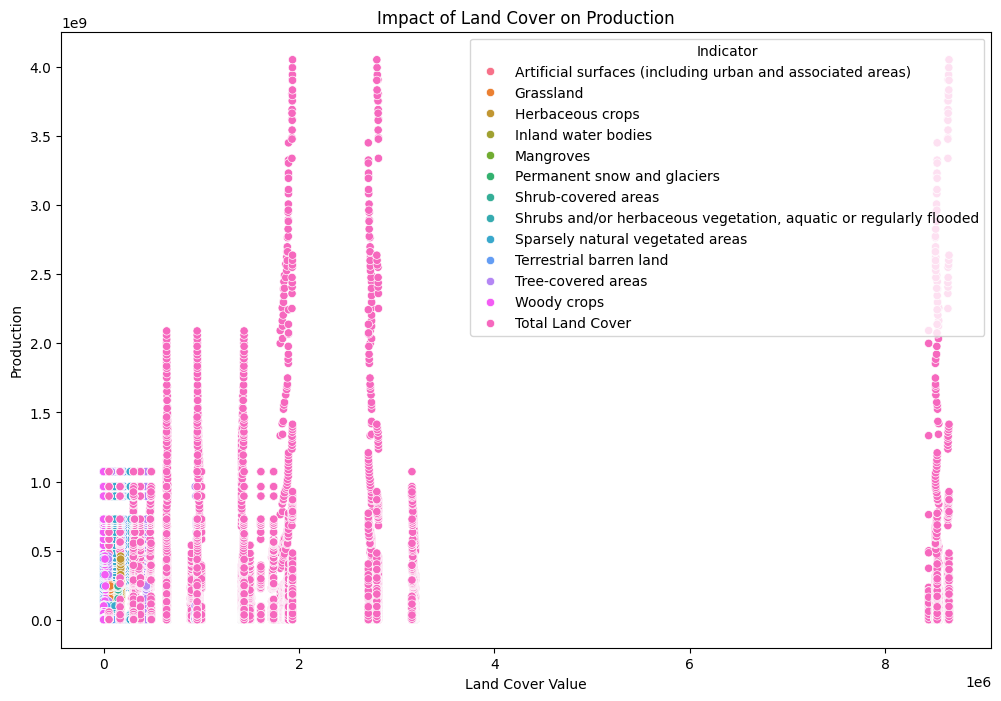

In [52]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Value', y='production', data=merged_data, hue='Indicator')
plt.title('Impact of Land Cover on Production')
plt.xlabel('Land Cover Value')
plt.ylabel('Production')
plt.legend(title='Indicator')
plt.show()


i want to remove "total land cover"" from the plot to see just the effect of differen types

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


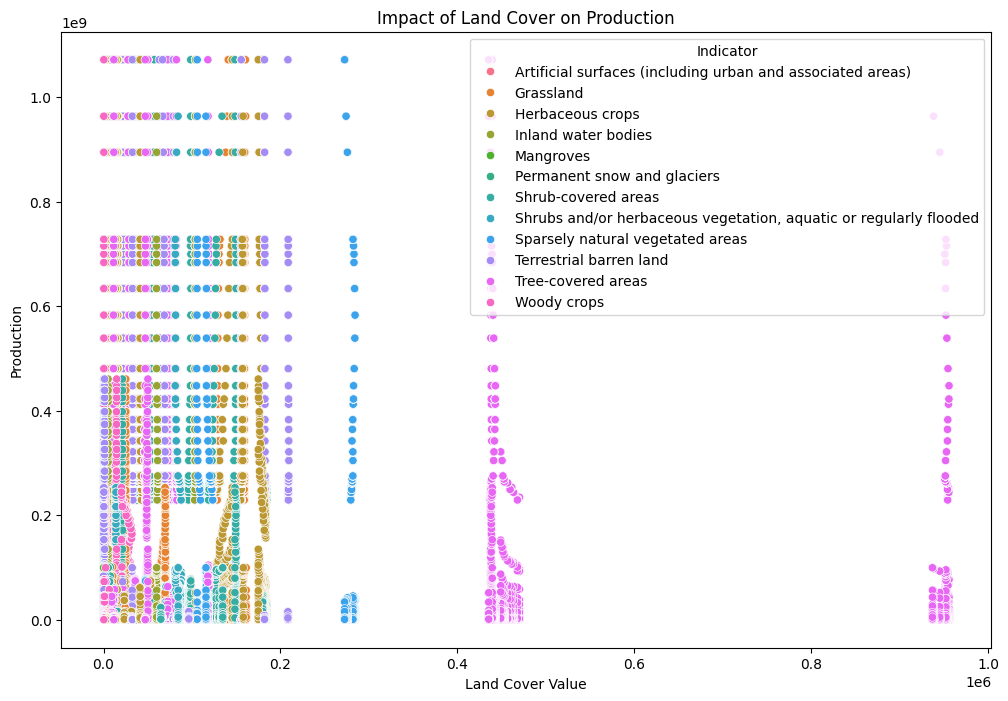

In [53]:
merged_data_  = merged_data[merged_data['Indicator'] != 'Total Land Cover']
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Value', y='production', data=merged_data_, hue='Indicator')
plt.title('Impact of Land Cover on Production')
plt.xlabel('Land Cover Value')
plt.ylabel('Production')
plt.legend(title='Indicator')
plt.show()

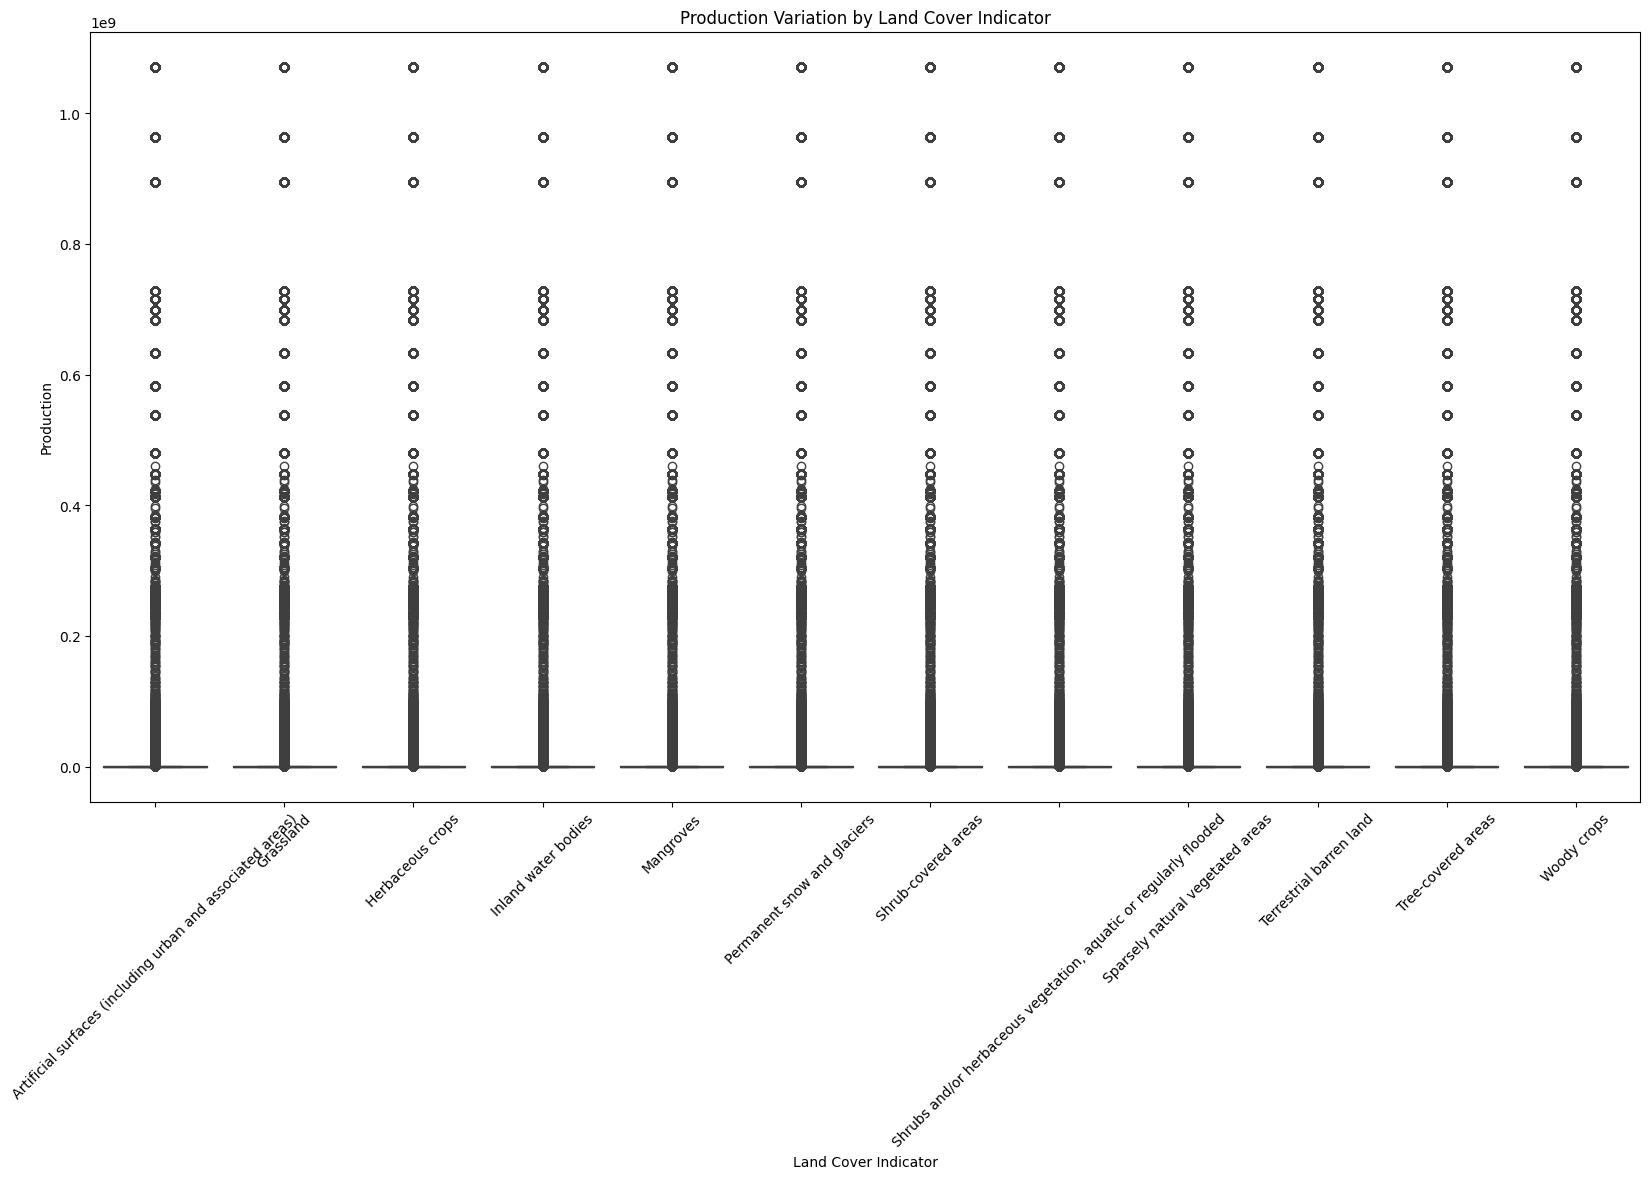

In [54]:
plt.figure(figsize = (20,10))
sns.boxplot(x='Indicator', y='production', data=merged_data_)
plt.title('Production Variation by Land Cover Indicator')
plt.xlabel('Land Cover Indicator')
plt.ylabel('Production')
plt.xticks(rotation = 45)
plt.show()

<Figure size 1000x600 with 0 Axes>

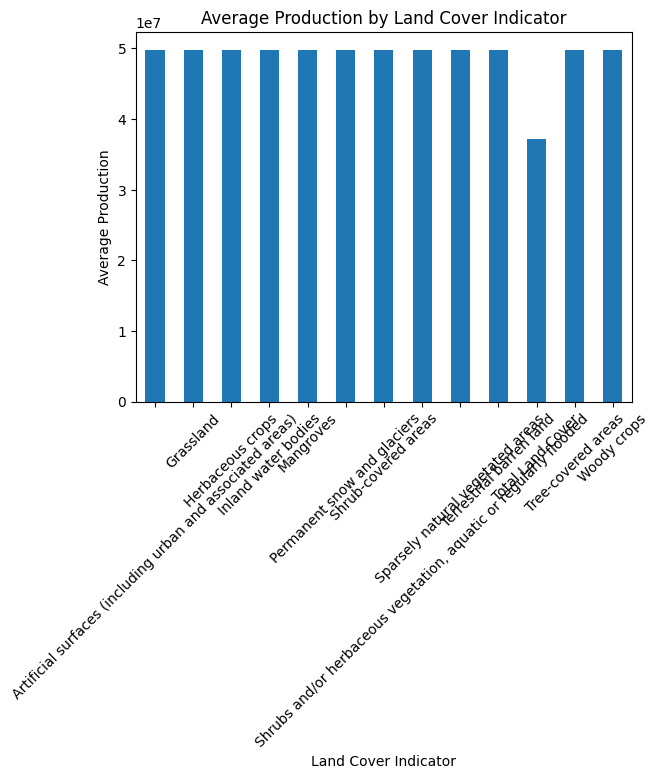

In [55]:
# Pivot table to get correlations between indicators
pivot_df = merged_data.pivot_table(index='Indicator', values='production', aggfunc='mean')

# Plotting correlations
plt.figure(figsize=(10, 6))
pivot_df.plot(kind='bar', legend=None)
plt.title('Average Production by Land Cover Indicator')
plt.xlabel('Land Cover Indicator')
plt.ylabel('Average Production')
plt.xticks(rotation=45)
plt.show()


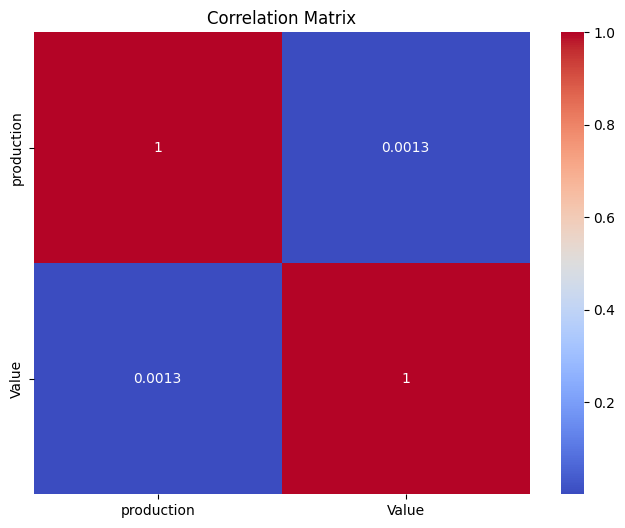

In [58]:
# Calculate the correlation matrix
correlation_matrix = merged_data[['production',  'Value']].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [22]:
sea_level = sea_level.loc[:,~sea_level.columns.str.contains('^Unnamed')]

In [23]:
sea_level.head()

,Country,Indicator,Unit,Measure,year,Value
0,World,Change in mean sea level: Sea level: Jason.1,Millimeters,Adriatic Sea,2002,20.198571
1,World,Change in mean sea level: Sea level: Jason.1,Millimeters,Adriatic Sea,2003,5.792703
2,World,Change in mean sea level: Sea level: Jason.1,Millimeters,Adriatic Sea,2004,13.352162
3,World,Change in mean sea level: Sea level: Jason.1,Millimeters,Adriatic Sea,2005,3.733243
4,World,Change in mean sea level: Sea level: Jason.1,Millimeters,Adriatic Sea,2006,4.801111


In [24]:
sea_level.rename(columns = {'year':'Year'},inplace = True)

In [25]:
#sea_level.drop(columns=['Unit'],inplace = True)

In [26]:
sea_level.Indicator.unique()

array(['Change in mean sea level: Sea level: Jason.1',
       'Change in mean sea level: Sea level: Jason.2',
       'Change in mean sea level: Sea level: Jason.3',
       'Change in mean sea level: Sea level: TOPEX.Poseidon',
       'Change in mean sea level: Sea level: Trend'], dtype=object)

All these indicators measure same thing so we have to keep just one (the most accurate one is jason.3 but we have to see which one has ore data to keep)

In [27]:
indicator_counts = sea_level['Indicator'].value_counts()
indicator_counts

Indicator
Change in mean sea level: Sea level: TOPEX.Poseidon    350
Change in mean sea level: Sea level: Jason.1           300
Change in mean sea level: Sea level: Jason.2           250
Change in mean sea level: Sea level: Jason.3           175
Change in mean sea level: Sea level: Trend              25
Name: count, dtype: int64

In [28]:
sea_level.columns

Index(['Country', 'Indicator', 'Unit', 'Measure', 'Year', 'Value'], dtype='object')

In [29]:
indicator_year_counts = sea_level.groupby(['Indicator', 'Year']).size().reset_index(name='Count')

In [30]:
pd.set_option('display.max_rows',None)
indicator_year_counts

,Indicator,Year,Count
0,Change in mean sea level: Sea level: Jason.1,2002,25
1,Change in mean sea level: Sea level: Jason.1,2003,25
2,Change in mean sea level: Sea level: Jason.1,2004,25
3,Change in mean sea level: Sea level: Jason.1,2005,25
4,Change in mean sea level: Sea level: Jason.1,2006,25
5,Change in mean sea level: Sea level: Jason.1,2007,25
6,Change in mean sea level: Sea level: Jason.1,2008,25
7,Change in mean sea level: Sea level: Jason.1,2009,25
8,Change in mean sea level: Sea level: Jason.1,2010,25
9,Change in mean sea level: Sea level: Jason.1,2011,25


so i will work with 'Change in mean sea level: Sea level: Jason.2	'

In [31]:
sea_level = sea_level[sea_level['Indicator'] == 'Change in mean sea level: Sea level: Jason.2']
sea_level.drop(columns = ['Indicator'],inplace = True)

<ipython-input-31-655a2bf9efb9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sea_level.drop(columns = ['Indicator'],inplace = True)


In [32]:
sea_level.shape

(250, 5)

In [33]:
sea_level.Measure.unique()

array(['Adriatic Sea', 'Andaman Sea', 'Arabian Sea', 'Atlantic Ocean',
       'Baltic Sea', 'Bay Bengal', 'Bering Sea', 'Caribbean Sea',
       'Gulf Mexico', 'Indian Ocean', 'Indonesian', 'Mediterranean',
       'Nino', 'North Atlantic', 'North Pacific', 'North Sea',
       'Pacific Ocean', 'Persian Gulf', 'Sea Japan', 'Sea Okhotsk',
       'South China', 'Southern Ocean', 'Tropics', 'World', 'Yellow Sea'],
      dtype=object)

In [34]:
sea_level.head()

,Country,Unit,Measure,Year,Value
300,World,Millimeters,Adriatic Sea,2008,27.953529
301,World,Millimeters,Adriatic Sea,2009,26.419189
302,World,Millimeters,Adriatic Sea,2010,64.689459
303,World,Millimeters,Adriatic Sea,2011,28.981351
304,World,Millimeters,Adriatic Sea,2012,19.959730


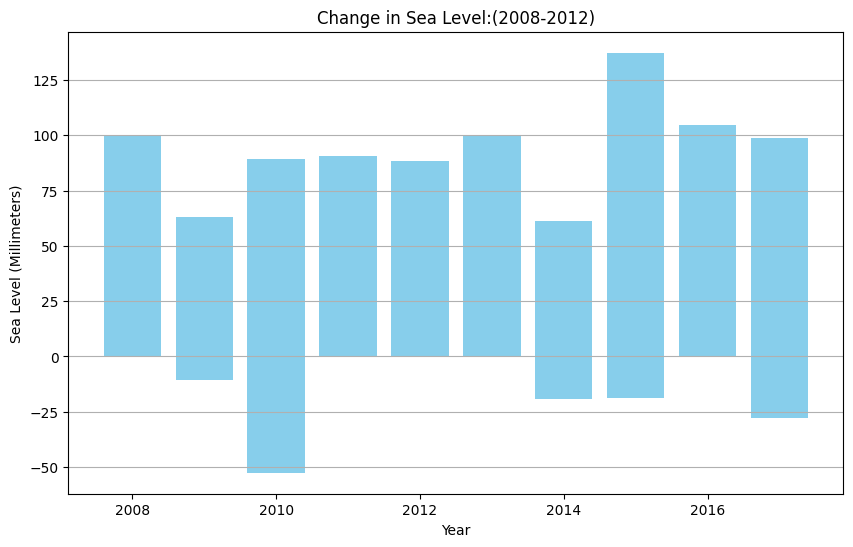

In [35]:
plt.figure(figsize=(10, 6))
plt.bar(sea_level['Year'], sea_level['Value'], color='skyblue')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Sea Level (Millimeters)')
plt.title('Change in Sea Level:(2008-2012)')
plt.grid(axis='y')

# Show the plot
plt.show()

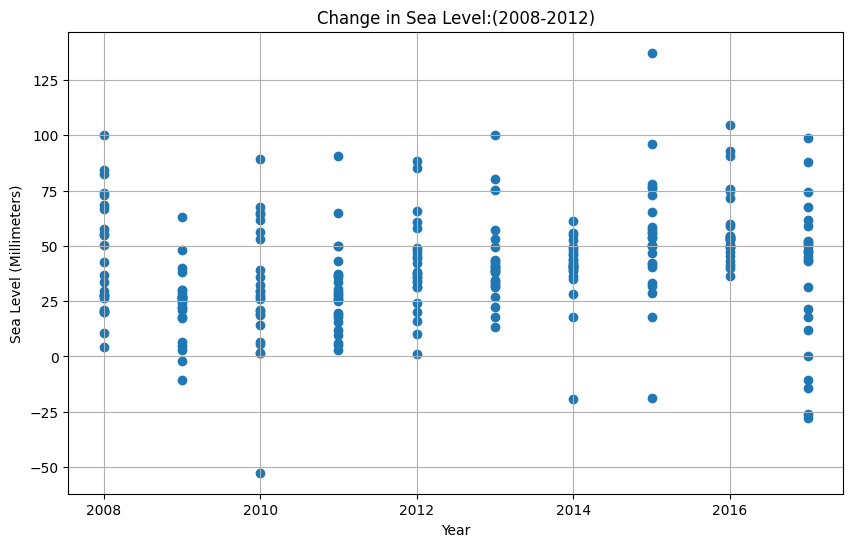

In [36]:
# Plotting the data
plt.figure(figsize=(10, 6))
plt.scatter(sea_level['Year'], sea_level['Value'], marker='o')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Sea Level (Millimeters)')
plt.title('Change in Sea Level:(2008-2012)')
plt.grid(True)

# Show the plot
plt.show()

In [37]:
sea_level['Year'] = sea_level['Year'].astype(int)
melted_production['Year'] = melted_production['Year'].astype(int)

In [38]:
sea_level_production = pd.merge(melted_production, sea_level, on='Year', how='inner')

In [39]:
pd.set_option('display.max_rows',10)
sea_level_production.head()

,Area,Item,Year,production,Country,Unit,Measure,Value
0,Afghanistan,"Almonds, in shell",2008,212356.0,World,Millimeters,Adriatic Sea,27.953529
1,Afghanistan,"Almonds, in shell",2008,212356.0,World,Millimeters,Andaman Sea,84.379412
2,Afghanistan,"Almonds, in shell",2008,212356.0,World,Millimeters,Arabian Sea,4.197647
3,Afghanistan,"Almonds, in shell",2008,212356.0,World,Millimeters,Atlantic Ocean,27.143529
4,Afghanistan,"Almonds, in shell",2008,212356.0,World,Millimeters,Baltic Sea,100.314706


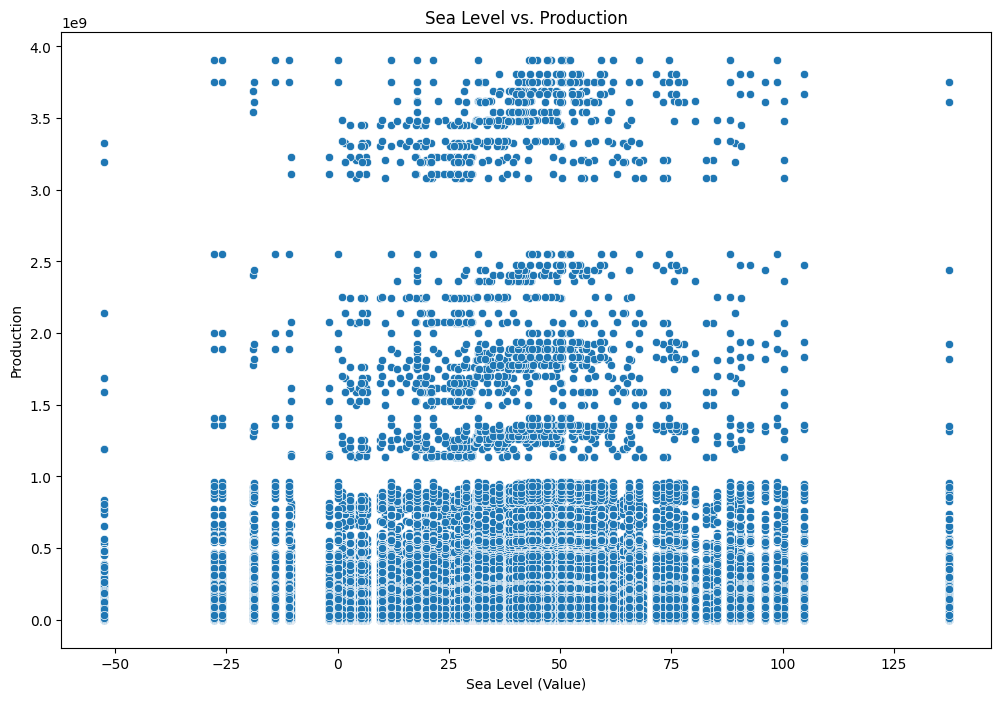

In [40]:
# Scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Value', y='production', data=sea_level_production)
plt.title('Sea Level vs. Production')
plt.xlabel('Sea Level (Value)')
plt.ylabel('Production')
plt.show()

In [42]:
# Calculate the correlation between sea level (Value) and production
correlation = sea_level_production['Value'].corr(sea_level_production['production'])
print(f"Correlation between Sea Level and Production: {correlation}")


Correlation between Sea Level and Production: 0.01015132097860354


In [21]:
atmospheric.head()

,Unnamed: 0,Country,Indicator,Unit,year,Value
0,67,World,Yearly Atmospheric Carbon Dioxide Concentratio...,Percent,1959,0.236000
1,68,World,Yearly Atmospheric Carbon Dioxide Concentratio...,Percent,1960,0.293333
2,69,World,Yearly Atmospheric Carbon Dioxide Concentratio...,Percent,1961,0.232500
3,70,World,Yearly Atmospheric Carbon Dioxide Concentratio...,Percent,1962,0.255833
4,71,World,Yearly Atmospheric Carbon Dioxide Concentratio...,Percent,1963,0.168333


In [30]:
atmospheric.Indicator.unique()

array(['Yearly Atmospheric Carbon Dioxide Concentrations, Year on Year Percentage Change'],
      dtype=object)

In [31]:
atmospheric.Indicator.unique()

array(['Yearly Atmospheric Carbon Dioxide Concentrations, Year on Year Percentage Change'],
      dtype=object)

In [35]:
atmospheric = atmospheric.loc[:,~atmospheric.columns.str.contains('^Unnamed')]
atmospheric.rename(columns = {'Value':'CO2concentration','year':'Year'},inplace = True)
atmospheric.drop(columns = ['Country','Indicator','Unit'],inplace = True)

KeyError: "['Country', 'Indicator', 'Unit'] not found in axis"

In [36]:
atmospheric.head()

,year,CO2concentration
0,1959,0.236000
1,1960,0.293333
2,1961,0.232500
3,1962,0.255833
4,1963,0.168333


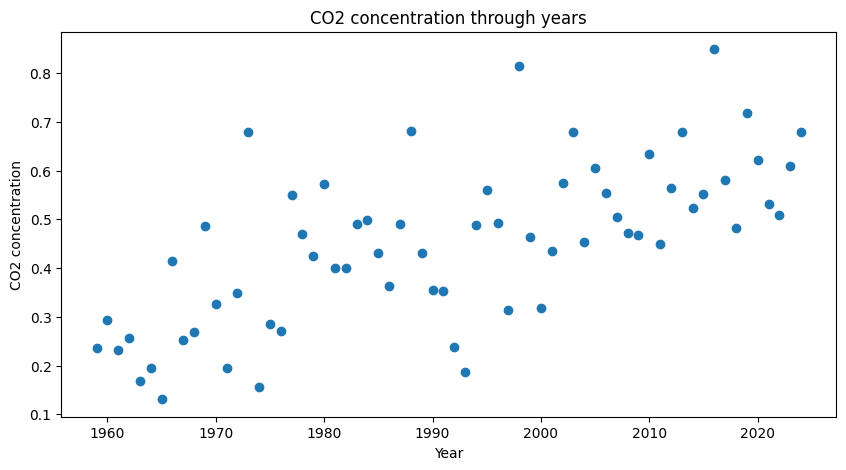

In [40]:
plt.figure(figsize = (10,5))
plt.scatter(atmospheric['Year'],atmospheric['CO2concentration'])
plt.title('CO2 concentration through years')
plt.xlabel('Year')
plt.ylabel('CO2 concentration')
plt.show()

In [43]:
melted_production['Year'] = melted_production['Year'].astype(int)
atmospheric['Year'] = atmospheric['Year'].astype(int)
production_CO2 = pd.merge(melted_production, atmospheric, on = ['Year'])

In [44]:
production_CO2.head()

,Area,Item,Year,production,CO2concentration
0,Afghanistan,"Almonds, in shell",1961,1.042449e+08,0.2325
1,Afghanistan,"Anise, badian, coriander, cumin, caraway, fenn...",1961,1.042449e+08,0.2325
2,Afghanistan,Apples,1961,7.127000e+03,0.2325
3,Afghanistan,Apricots,1961,2.621000e+04,0.2325
4,Afghanistan,Barley,1961,7.364400e+04,0.2325


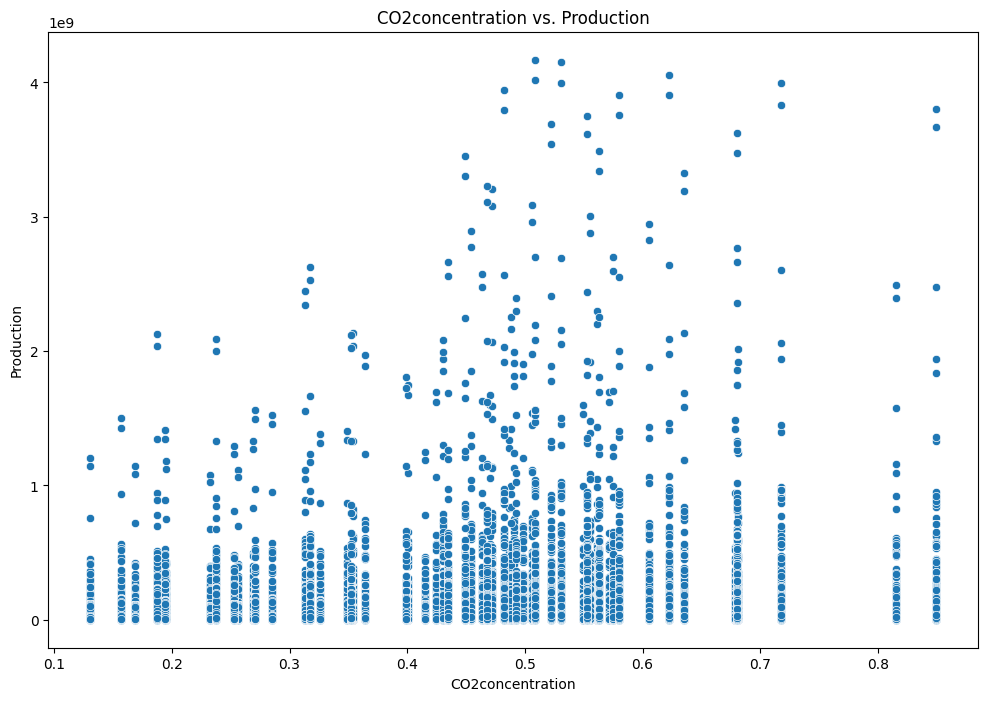

In [46]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='CO2concentration', y='production', data=production_CO2)
plt.title('CO2concentration vs. Production')
plt.xlabel('CO2concentration')
plt.ylabel('Production')
plt.show()

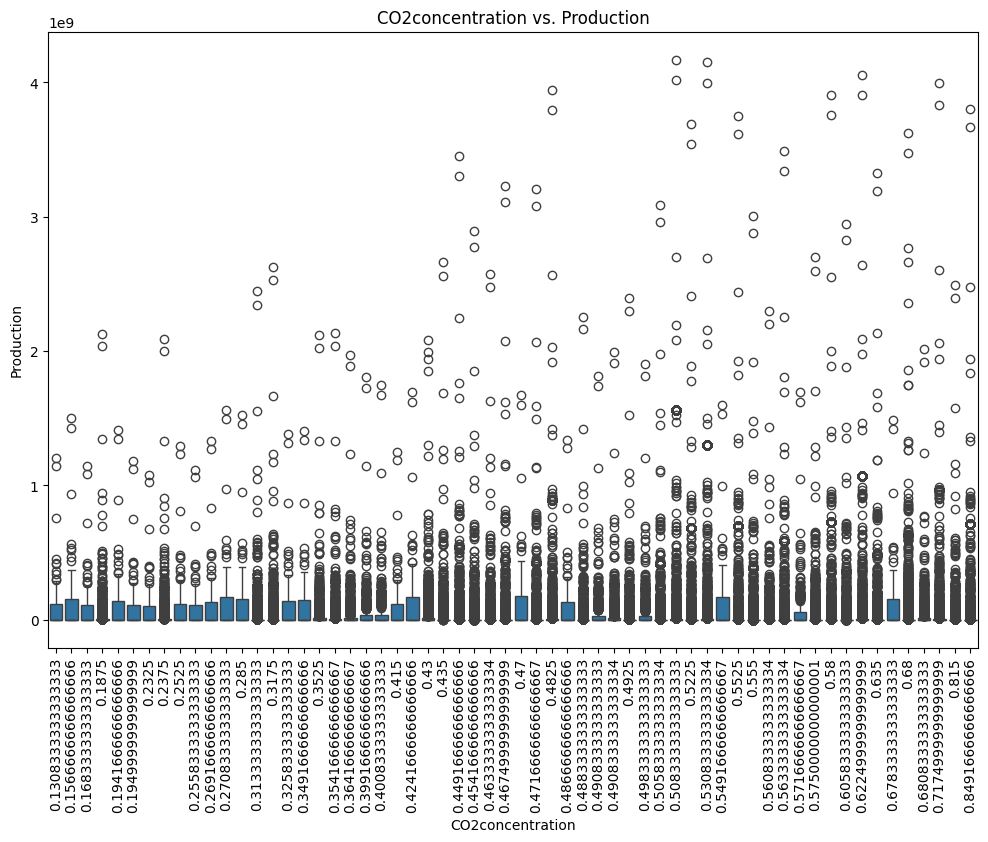

In [49]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='CO2concentration', y='production', data=production_CO2)
plt.title('CO2concentration vs. Production')
plt.xlabel('CO2concentration')
plt.xticks(rotation = 90)
plt.ylabel('Production')
plt.show()

In [51]:
# Calculate correlations
correlation_CO2 = production_CO2['CO2concentration'].corr(production_CO2['production'])
print(f"Correlation between CO2 Concentration and Production: {correlation_CO2}")

Correlation between CO2 Concentration and Production: 0.06949390550330825
